In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salesdf=pd.read_csv("Downloads/supermarket_sales.csv")

In [3]:
salesdf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
salesdf.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
salesdf.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
salesdf.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

no null values found and 9 objects found which will be converted later in the analysis now let us continue with EDA

## EDA

In [8]:
salesdf.drop(['Invoice ID'],axis=1,inplace=True)

In [9]:
type(salesdf["Date"])

pandas.core.series.Series

In [10]:
salesdf['Date']=pd.to_datetime(salesdf['Date'])

In [11]:
salesdf['weekday']=salesdf['Date'].dt.day_name()

In [12]:
salesdf['weekday'].head()

0    Saturday
1      Friday
2      Sunday
3      Sunday
4      Friday
Name: weekday, dtype: object

In [13]:
salesdf['weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [14]:
salesdf['month_name']=salesdf['Date'].dt.month_name()

In [15]:
salesdf['month_name'].head()

0     January
1       March
2       March
3     January
4    February
Name: month_name, dtype: object

In [16]:
salesdf.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


In [17]:
salesdf['month_name'].unique()

array(['January', 'March', 'February'], dtype=object)

we can observe that the dataset is related to only  months of january,february and march 

now we will find the avg transaction for each month and what is the min transaction and 
what is the max transaction for each month

In [18]:
jan_data=salesdf[salesdf['month_name'] == 'January']
jan_data.loc[:'Total'].mean()

Unit price                  56.119006
Quantity                     5.582386
Tax 5%                      15.732125
Total                      330.374625
cogs                       314.642500
gross margin percentage      4.761905
gross income                15.732125
Rating                       7.017614
dtype: float64

we can see the mean value is as Total=330.374625

In [19]:
jan_data.loc[:'Total'].max()

Branch                                       C
City                                    Yangon
Customer type                           Normal
Gender                                    Male
Product line                 Sports and travel
Unit price                               99.96
Quantity                                    10
Tax 5%                                   49.26
Total                                  1034.46
Date                       2019-01-31 00:00:00
Time                                     20:59
Payment                                Ewallet
cogs                                     985.2
gross margin percentage                 4.7619
gross income                             49.26
Rating                                     9.9
weekday                              Wednesday
month_name                             January
dtype: object

we can see the maximum value as Total =1034.46

In [20]:
jan_data.loc[:'Total'].min()

Branch                                          A
City                                     Mandalay
Customer type                              Member
Gender                                     Female
Product line               Electronic accessories
Unit price                                  10.53
Quantity                                        1
Tax 5%                                     0.6045
Total                                     12.6945
Date                          2019-01-01 00:00:00
Time                                        10:00
Payment                                      Cash
cogs                                        12.09
gross margin percentage                    4.7619
gross income                               0.6045
Rating                                          4
weekday                                    Friday
month_name                                January
dtype: object

we can observe the minimum value as Total=12.6945

In [21]:
feb_data=salesdf[salesdf['month_name'] == 'February']
feb_data.loc[:'Total'].mean()

Unit price                  56.632079
Quantity                     5.458746
Tax 5%                      15.278858
Total                      320.856020
cogs                       305.577162
gross margin percentage      4.761905
gross income                15.278858
Rating                       7.071287
dtype: float64

we can observe that the mean value of feb is Total= 320.856020

In [22]:
feb_data.loc[:'Total'].max()

Branch                                       C
City                                    Yangon
Customer type                           Normal
Gender                                    Male
Product line                 Sports and travel
Unit price                               99.89
Quantity                                    10
Tax 5%                                   49.65
Total                                  1042.65
Date                       2019-02-28 00:00:00
Time                                     20:51
Payment                                Ewallet
cogs                                       993
gross margin percentage                 4.7619
gross income                             49.65
Rating                                      10
weekday                              Wednesday
month_name                            February
dtype: object

we can observe that the max value in feb is Total=1042.65

In [23]:
feb_data.loc[:'Total'].min()

Branch                                          A
City                                     Mandalay
Customer type                              Member
Gender                                     Female
Product line               Electronic accessories
Unit price                                  10.16
Quantity                                        1
Tax 5%                                     0.5085
Total                                     10.6785
Date                          2019-02-01 00:00:00
Time                                        10:00
Payment                                      Cash
cogs                                        10.17
gross margin percentage                    4.7619
gross income                               0.5085
Rating                                          4
weekday                                    Friday
month_name                               February
dtype: object

we can observe that the min value of feb is Total= 10.6785

In [24]:
mar_data=salesdf[salesdf['month_name'] == 'March']
mar_data.loc[:'Total'].mean()

Unit price                  54.373101
Quantity                     5.481159
Tax 5%                      15.107730
Total                      317.262339
cogs                       302.154609
gross margin percentage      4.761905
gross income                15.107730
Rating                       6.840290
dtype: float64

we can observe that  the mean value of march is Total = 317.262339

In [25]:
mar_data.loc[:'Total'].max()

Branch                                       C
City                                    Yangon
Customer type                           Normal
Gender                                    Male
Product line                 Sports and travel
Unit price                               99.96
Quantity                                    10
Tax 5%                                   48.69
Total                                  1022.49
Date                       2019-03-30 00:00:00
Time                                     20:57
Payment                                Ewallet
cogs                                     973.8
gross margin percentage                 4.7619
gross income                             48.69
Rating                                      10
weekday                              Wednesday
month_name                               March
dtype: object

we can observe that the maxx value in the march is Total=1022.49

In [26]:
mar_data.loc[:'Total'].min()

Branch                                          A
City                                     Mandalay
Customer type                              Member
Gender                                     Female
Product line               Electronic accessories
Unit price                                  10.08
Quantity                                        1
Tax 5%                                      0.775
Total                                      16.275
Date                          2019-03-01 00:00:00
Time                                        10:05
Payment                                      Cash
cogs                                         15.5
gross margin percentage                    4.7619
gross income                                0.775
Rating                                          4
weekday                                    Friday
month_name                                  March
dtype: object

the min value in march is Total=16.275

## Visualizations

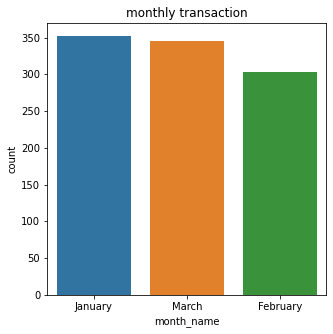

In [27]:
plt.figure(figsize=(5,5))
plt.title("monthly transaction")
sns.countplot(salesdf['month_name'])

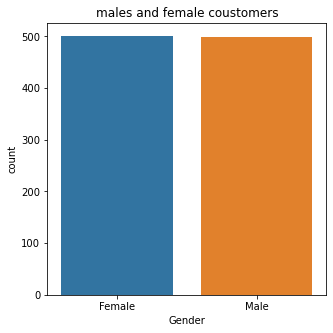

In [28]:
plt.figure(figsize=(5,5))
plt.title('males and female coustomers')
sns.countplot(salesdf['Gender'])

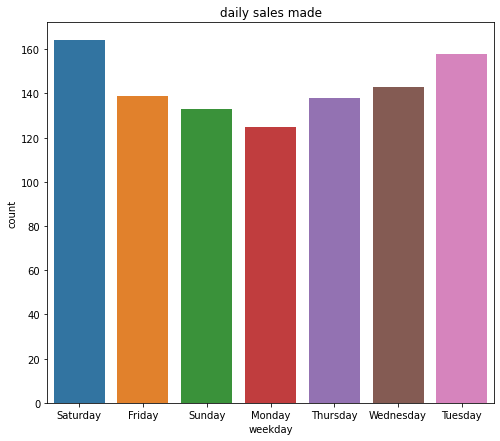

In [29]:
plt.figure(figsize=(8,7))
plt.title("daily sales made")
sns.countplot(salesdf['weekday'])

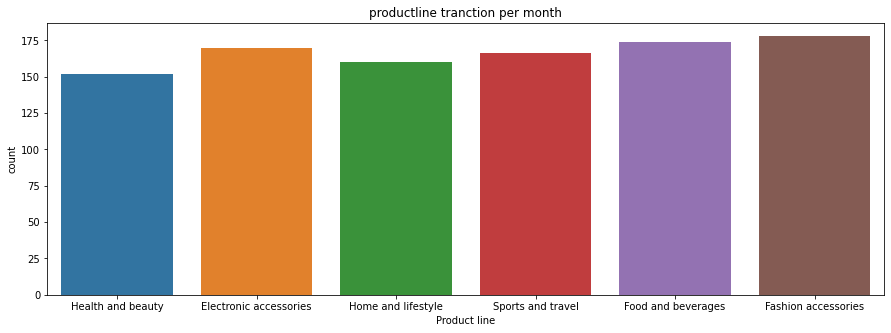

In [30]:
plt.figure(figsize=(15,5))
plt.title('productline tranction per month')
sns.countplot(salesdf['Product line'])

In [31]:
salesdf["month_name"].value_counts()

January     352
March       345
February    303
Name: month_name, dtype: int64

In [32]:
salesdf['weekday'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

Text(0.5, 1.0, 'Transaction per month')

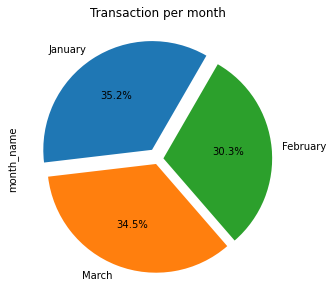

In [33]:
plt.figure(figsize=(5,5))
explode=(0.1,0.05,0.05)
salesdf['month_name'].value_counts().plot.pie(autopct='%0.1f%%',startangle=60,explode=explode)
plt.title('Transaction per month')

Text(0.5, 1.0, 'productline traction per month')

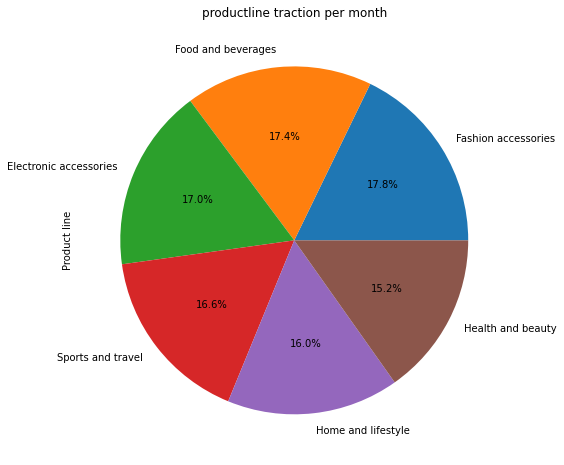

In [34]:
plt.figure(figsize=(8,8))
salesdf['Product line'].value_counts().plot.pie(autopct='%0.1f%%')
plt.title('productline traction per month')

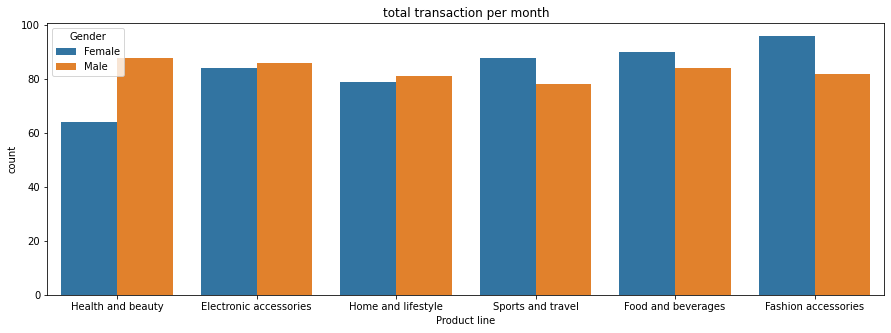

In [35]:
plt.figure(figsize=(15,5))
plt.title('total transaction per month')
sns.countplot(salesdf['Product line'],hue=salesdf['Gender'])

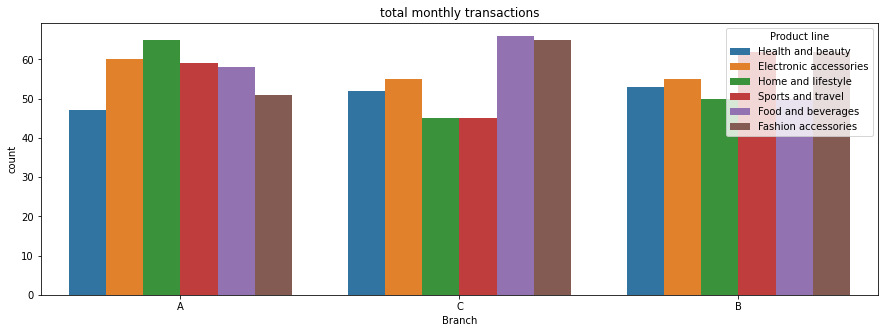

In [36]:
plt.figure(figsize=(15,5))
plt.title('total monthly transactions')
sns.countplot(salesdf['Branch'],hue=salesdf['Product line'])

From the above visualisation, Most customers purchase Home and Lifestyle products from branch A than C, 
Fashion accessories has most customers in branches C and B than in A and finally Sports and 
travel has most customers in branch B than in the rest. By this, as an analyst you can deduce that
instead of commodities taking longer in the store they can be transfered to branches where their demand is high, 
e.g Part of Home and Lifestyle products can be taken to branch A to C because there are approximately 5 customers 
in Branch A for every single customer in brach C for the same commodity.

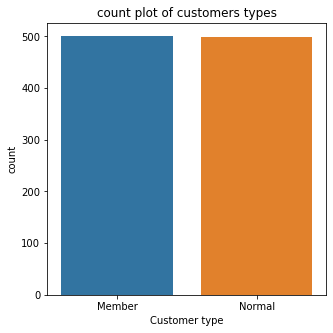

In [37]:
plt.figure(figsize=(5,5))
plt.title('count plot of customers types')
sns.countplot(salesdf['Customer type'])

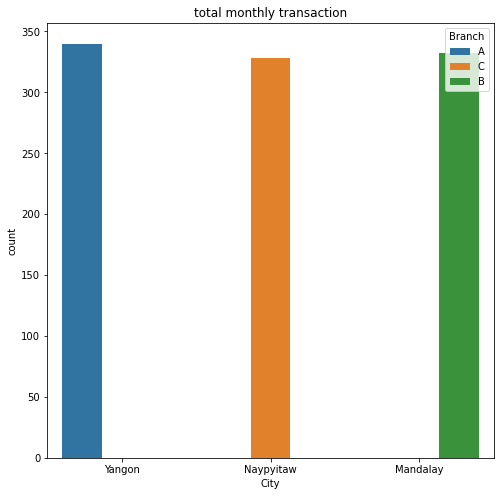

In [38]:
plt.figure(figsize=(8,8))
plt.title('total monthly transaction')
sns.countplot(salesdf['City'],hue=salesdf['Branch'])

from the above we can conclude that branches A,B,C are found in yangon, naypyitaw,mandalay respectivily.

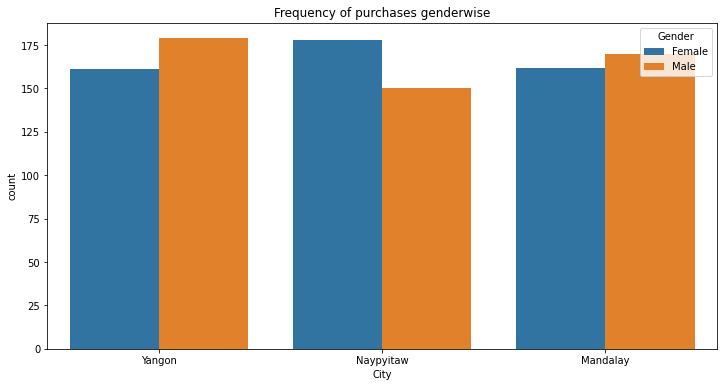

In [39]:
plt.figure(figsize=(12, 6))
plt.title('Frequency of purchases genderwise')
sns.countplot(salesdf['City'], hue=salesdf['Gender'])

In Branch A(Yangon), the active purchase gender is Male and in B its Female

## Time series analysis

Text(0.5, 1.0, 'Frequency of Transaction made per day')

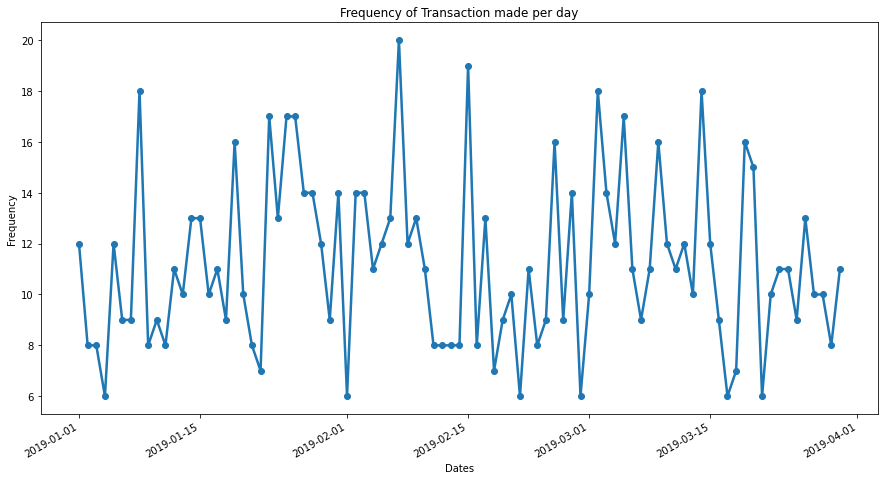

In [40]:
salesdf['Date'].value_counts(sort=True).plot(kind='line', linewidth=2.5,linestyle='-', marker='o', figsize=(15, 8))
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.title('Frequency of Transaction made per day', )

In [41]:
salesdf.drop(['Branch','weekday','month_name'],axis=1,inplace=True)

In [42]:
salesdf.columns.unique()

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [43]:
salesdf=pd.get_dummies(salesdf,columns=['City','Customer type','Gender','Product line','Payment'],drop_first=True)

In [44]:
salesdf.head()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,2019-01-05,13:08,522.83,4.761905,26.1415,9.1,...,1,0,0,0,0,1,0,0,0,1
1,15.28,5,3.8200,80.2200,2019-03-08,10:29,76.40,4.761905,3.8200,9.6,...,0,1,0,0,0,0,0,0,0,0
2,46.33,7,16.2155,340.5255,2019-03-03,13:23,324.31,4.761905,16.2155,7.4,...,1,1,1,0,0,0,1,0,1,0
3,58.22,8,23.2880,489.0480,2019-01-27,20:33,465.76,4.761905,23.2880,8.4,...,1,0,1,0,0,1,0,0,0,1
4,86.31,7,30.2085,634.3785,2019-02-08,10:37,604.17,4.761905,30.2085,5.3,...,1,1,1,0,0,0,0,1,0,1


## splitting

In [45]:
x = salesdf.drop(["Total"], axis = 1)
y = salesdf["Total"]
print(x.head())
print(y.head())

   Unit price  Quantity   Tax 5%       Date   Time    cogs  \
0       74.69         7  26.1415 2019-01-05  13:08  522.83   
1       15.28         5   3.8200 2019-03-08  10:29   76.40   
2       46.33         7  16.2155 2019-03-03  13:23  324.31   
3       58.22         8  23.2880 2019-01-27  20:33  465.76   
4       86.31         7  30.2085 2019-02-08  10:37  604.17   

   gross margin percentage  gross income  Rating  City_Naypyitaw  City_Yangon  \
0                 4.761905       26.1415     9.1               0            1   
1                 4.761905        3.8200     9.6               1            0   
2                 4.761905       16.2155     7.4               0            1   
3                 4.761905       23.2880     8.4               0            1   
4                 4.761905       30.2085     5.3               0            1   

   Customer type_Normal  Gender_Male  Product line_Fashion accessories  \
0                     0            0                              

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 20) (250, 20) (750,) (250,)


In [53]:
x_train.head()

,Unit price,Quantity,Tax 5%,Date,Time,cogs,gross margin percentage,gross income,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
929,25.31,2,2.5310,2019-03-02,19:26,50.62,4.761905,2.5310,7.2,0,0,1,1,0,0,0,0,1,0,1
436,82.93,4,16.5860,2019-01-20,16:51,331.72,4.761905,16.5860,9.6,1,0,0,1,0,0,0,0,1,0,1
718,45.38,3,6.8070,2019-02-17,13:34,136.14,4.761905,6.8070,7.2,0,1,1,1,1,0,0,0,0,1,0
520,45.71,3,6.8565,2019-03-26,10:34,137.13,4.761905,6.8565,7.7,0,0,1,0,0,0,0,0,0,1,0
871,56.50,1,2.8250,2019-03-13,15:45,56.50,4.761905,2.8250,9.6,1,0,1,1,1,0,0,0,0,0,1


In [100]:
mean_squared_error(y_test,y_pred)

3.2095347700197357e-10

In [101]:
r2_score(y_test,y_pred)

0.9999999999999947

### Ridge

In [99]:
sales_model2 = Ridge(alpha = 1.0, fit_intercept = True, tol = 0.001, solver = "auto",max_iter = 100, random_state = None)
sales_model2.fit(x_train,y_train)
y_pred = sales_model2.predict(x_test)

In [102]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.791517448985562e-05

In [103]:
r2_score(y_test,y_pred)

0.9999999999999947

### losso regression

In [104]:
sales_model3 = Lasso(alpha = 1.0, fit_intercept = True, tol = 0.001, selection = "cyclic",max_iter = 100, random_state = None)
sales_model3.fit(x_train,y_train)
y_pred = sales_model2.predict(x_test)

In [105]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.791517448985562e-05

In [106]:
r2_score(y_test,y_pred)

0.9999999999999947